# Importing Libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Importting Data

In [2]:
df = pd.read_csv('Cleaner_data.csv')

In [3]:
df.columns = ['row ID','Financial_Year','Branch_Code','Sequence_1','Sequence_2','Donation_type','Donor_Age','Donation_Date','Gender','Blood_Group_Code','Donor_Weight','Donor_Temperature','Donor_Pulse','Donor_Hemoglobin','Donor_Blood_Pressure','Test_1','C1','Test_2','C2','Test_3','Test_4']

In [4]:
df = df.dropna()

In [5]:
df['Date'] = pd.to_datetime(df.Donation_Date, format='%d-%b-%y')

In [6]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,row ID,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,...,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,1,14,BRC-01,345,1.0,R,24.0,1-Jul-13,M,5,...,37.0,72,13.0,120/80,0.121,N,0.224,N,R,N
2013-07-01,2,14,BRC-01,346,2.0,R,33.0,1-Jul-13,M,3,...,37.0,72,13.0,120/80,0.122,N,0.222,N,N,N
2013-07-01,3,14,BRC-01,347,3.0,R,28.0,1-Jul-13,M,5,...,37.0,72,13.0,120/80,0.123,N,0.221,N,N,N
2013-07-01,4,14,BRC-01,348,4.0,R,20.0,1-Jul-13,M,3,...,37.0,72,13.0,120/80,0.123,N,0.242,N,N,N
2013-07-01,5,14,BRC-01,349,5.0,T,22.0,1-Jul-13,M,7,...,37.0,72,13.0,120/80,0.124,N,0.243,N,N,N


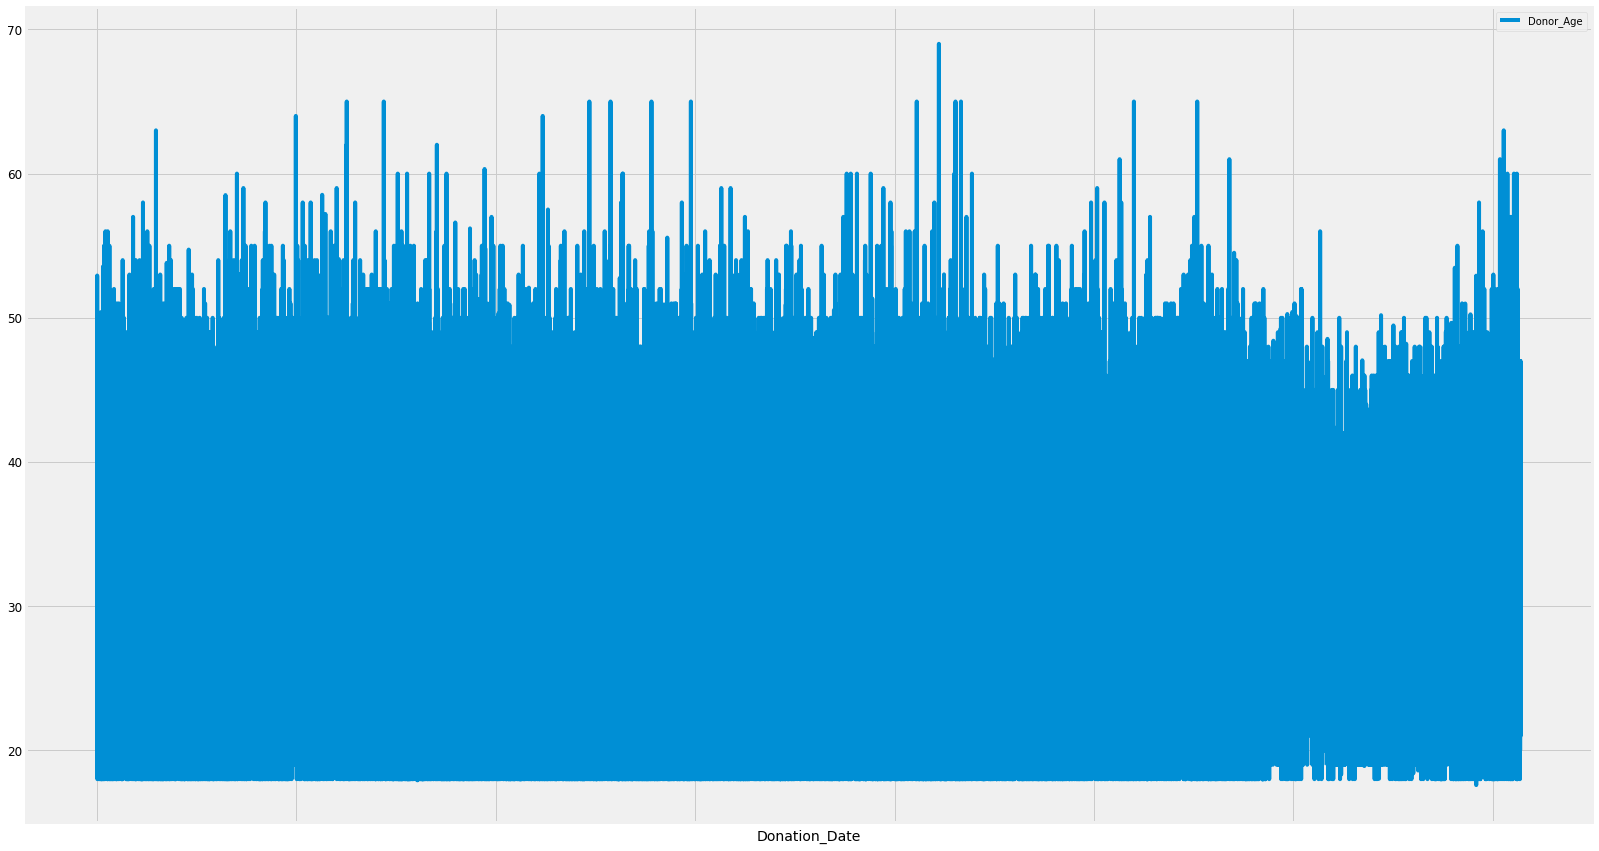

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15
df.plot('Donation_Date', 'Donor_Age')

In [8]:
print("Current size:", fig_size)

Current size: [25, 15]


In [10]:
monthly_summary = pd.DataFrame()
monthly_summary['Donor_Age'] = df['Donor_Age'].resample('M').mean()
monthly_summary['Donor_Weight'] = df['Donor_Weight'].resample('M').mean()
monthly_summary['Blood_Group_Code'] = df['Blood_Group_Code'].resample('M').mean()
monthly_summary['Donor_Temperature'] = df['Donor_Temperature'].resample('M').mean()
monthly_summary['Donor_Pulse'] = df['Donor_Pulse'].resample('M').mean()
monthly_summary['Donor_Hemoglobin'] = df['Donor_Hemoglobin'].resample('M').mean()
monthly_summary['Test_1'] = df['Test_1'].resample('M').mean()
monthly_summary['Test_2'] = df['Test_2'].resample('M').mean()

In [11]:
monthly_summary = monthly_summary.truncate(before='2016-01-05', after='2017-06-05')


In [12]:
monthly_summary.head()

,Donor_Age,Donor_Weight,Blood_Group_Code,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Test_1,Test_2
Date,,,,,,,,
2016-01-31,28.750469,73.369656,3.618129,37.000321,73.233044,13.034908,0.231897,63.113129
2016-02-29,28.934682,75.401719,3.669402,36.999609,72.491989,13.008597,0.617841,54.743598
2016-03-31,28.579593,72.719046,3.654156,37.000000,72.260961,13.034549,0.172371,64.980092
2016-04-30,28.846367,72.574519,3.614354,37.000000,72.359203,13.061298,0.164813,61.750550
2016-05-31,28.592782,73.809009,3.613385,37.000257,72.134620,13.030373,0.131451,69.675042


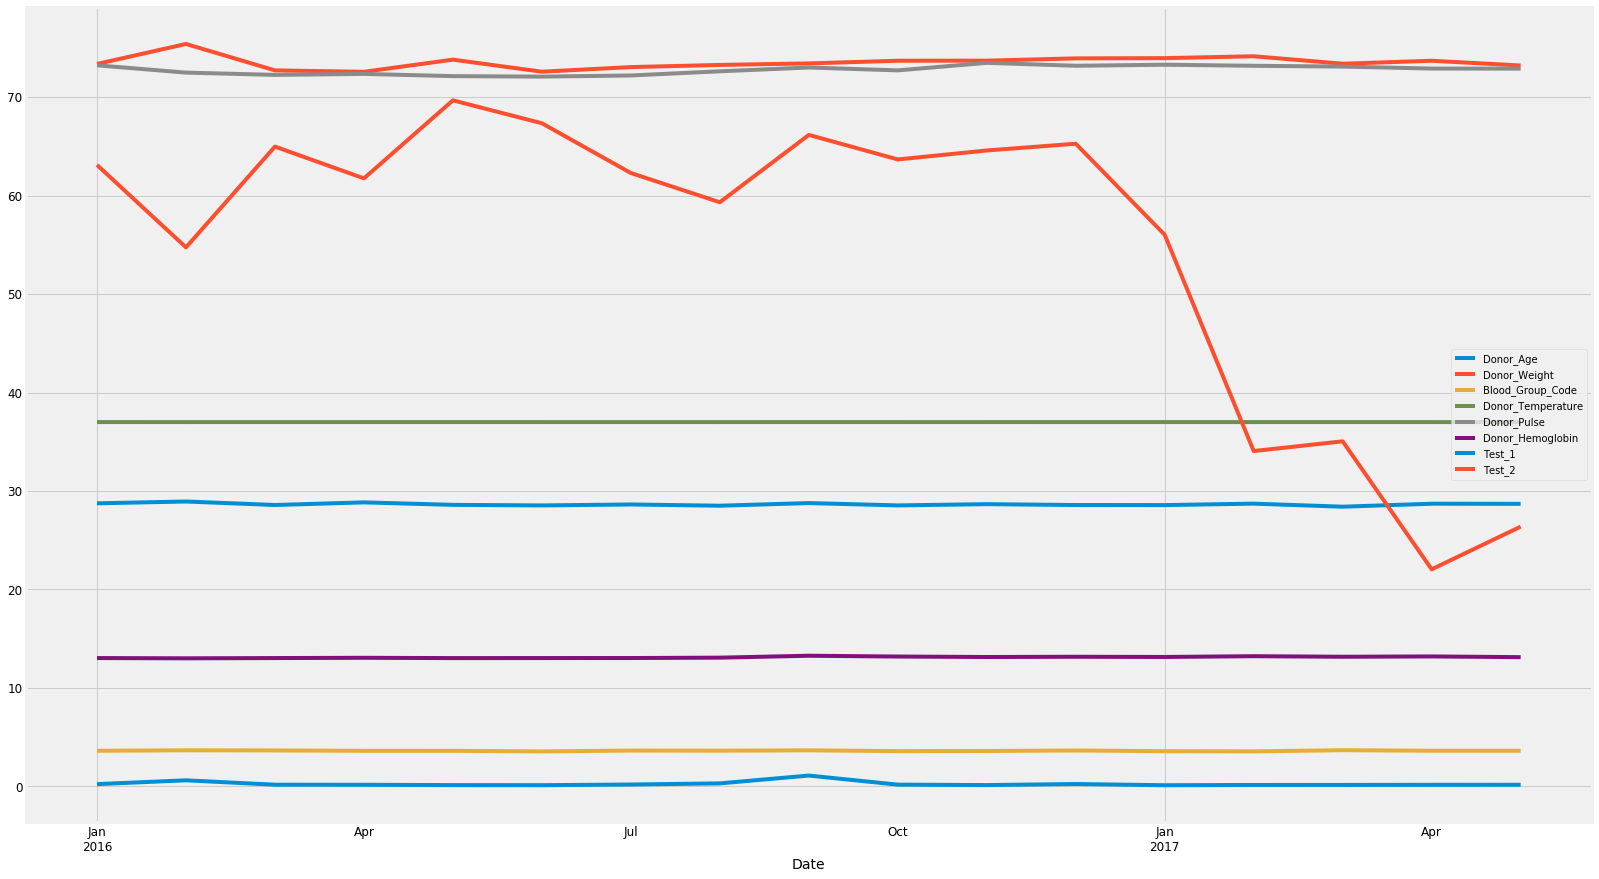

In [13]:
monthly_summary.plot()

In [14]:
daily_summary = pd.DataFrame()
daily_summary['Donor_Age'] = df['Donor_Age'].resample('D').mean()
daily_summary['Donor_Weight'] = df['Donor_Weight'].resample('D').mean()
daily_summary['Blood_Group_Code'] = df['Blood_Group_Code'].resample('D').mean()
daily_summary['Donor_Temperature'] = df['Donor_Temperature'].resample('D').mean()
daily_summary['Donor_Pulse'] = df['Donor_Pulse'].resample('D').mean()
daily_summary['Donor_Hemoglobin'] = df['Donor_Hemoglobin'].resample('D').mean()
daily_summary['Test_1'] = df['Test_1'].resample('D').mean()
daily_summary['Test_2'] = df['Test_2'].resample('D').mean()



In [15]:
yearly_summary = pd.DataFrame()
yearly_summary['Donor_Age'] = df['Donor_Age'].resample('Y').mean()
yearly_summary['Donor_Weight'] = df['Donor_Weight'].resample('Y').mean()
yearly_summary['Blood_Group_Code'] = df['Blood_Group_Code'].resample('Y').mean()
yearly_summary['Donor_Temperature'] = df['Donor_Temperature'].resample('Y').mean()
yearly_summary['Donor_Pulse'] = df['Donor_Pulse'].resample('Y').mean()
yearly_summary['Donor_Hemoglobin'] = df['Donor_Hemoglobin'].resample('Y').mean()
yearly_summary['Test_1'] = df['Test_1'].resample('Y').mean()
yearly_summary['Test_2'] = df['Test_2'].resample('Y').mean()



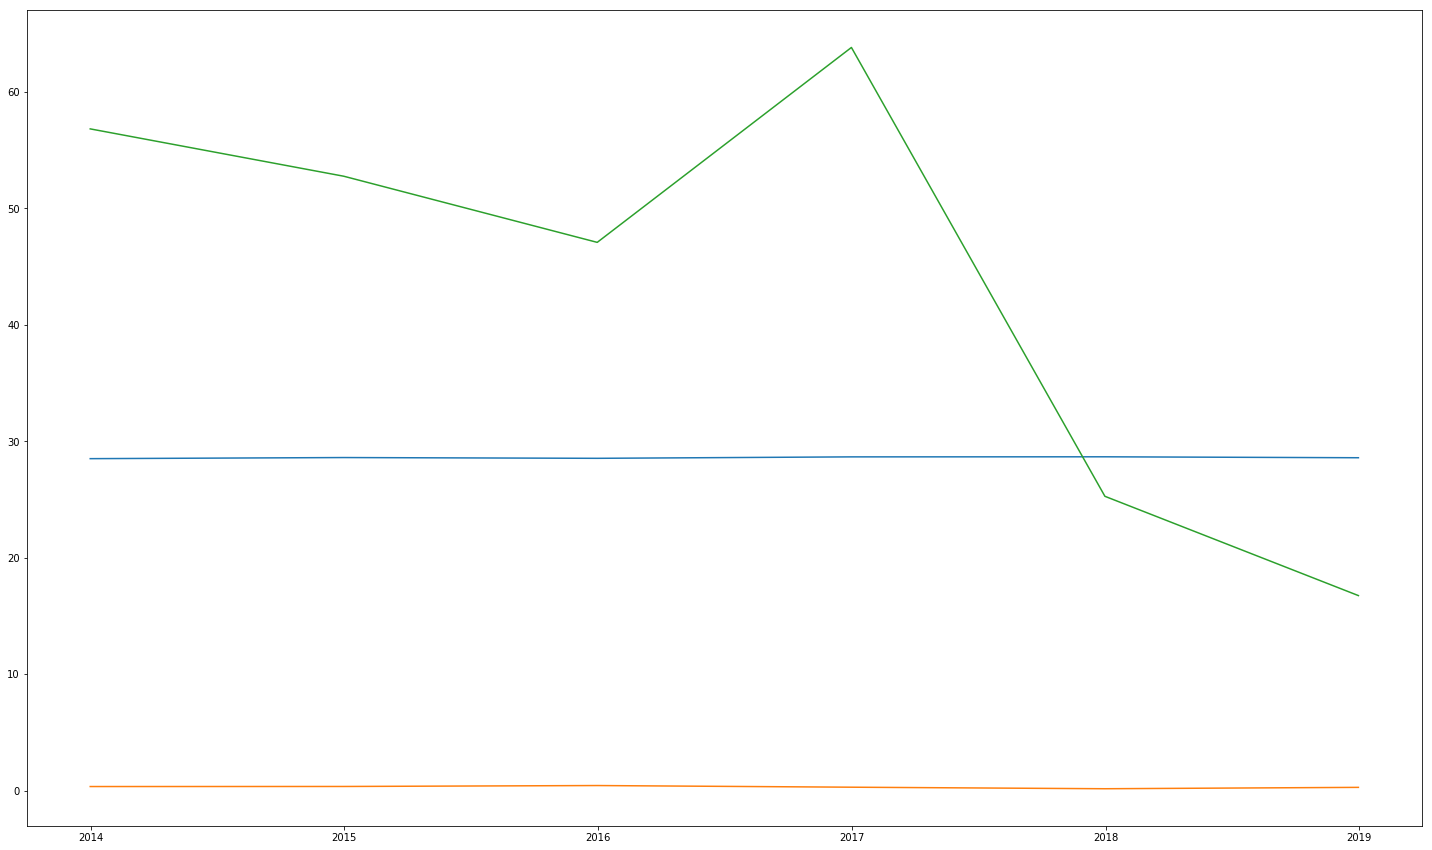

In [57]:
plt.plot(yearly_summary)

In [52]:
y['2016':]

Date
2016-01-31    28.750469
2016-02-29    28.934682
2016-03-31    28.579593
2016-04-30    28.846367
2016-05-31    28.592782
2016-06-30    28.536834
2016-07-31    28.633083
2016-08-31    28.507141
2016-09-30    28.774933
2016-10-31    28.538710
2016-11-30    28.665752
2016-12-31    28.575842
2017-01-31    28.570836
2017-02-28    28.716653
2017-03-31    28.407077
2017-04-30    28.708358
2017-05-31    28.696451
2017-06-30    28.552061
2017-07-31    28.876080
2017-08-31    28.767556
2017-09-30    28.559188
2017-10-31    28.743374
2017-11-30    28.673429
2017-12-31    28.694278
2018-01-31    28.435021
2018-02-28    28.374138
2018-03-31    28.743596
2018-04-30    28.668891
2018-05-31    28.557799
2018-06-30    28.665030
2018-07-31    28.568000
Freq: M, Name: Donor_Age, dtype: float64

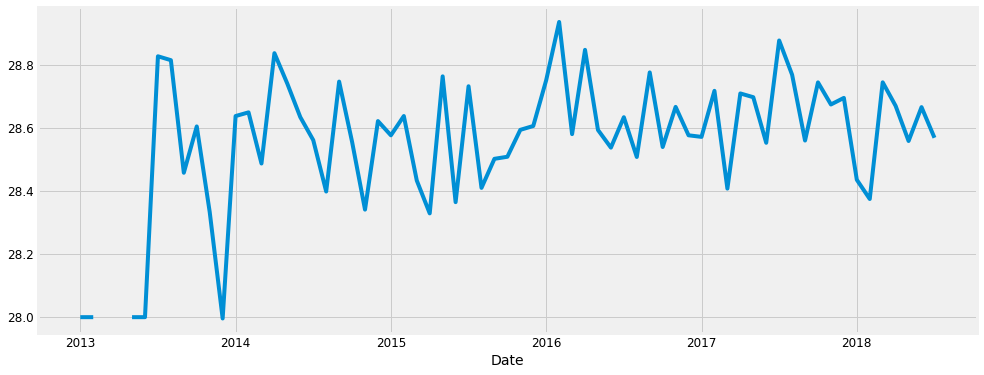

In [53]:
y.plot(figsize=(15, 6))
plt.show()

In [54]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:612.7370298577684
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:518.097790372007
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:46.11852841892875
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-8.475990355014599
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:50.48377818450468
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:36.61941384493869
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-13.498372215445126


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-9.681970355891801
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:523.109896042947


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:510.83067461138285
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:42.84336346328767
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-4.947031977957394
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:51.26836311394649


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:35.23598733453139
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-11.570950176965365


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-6.230215643751894
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4.007926658185877
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-11.631052378186792
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:68.44415243025601


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:21.376119639543106
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-13.191237462014822
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-10.113374592292228
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:22.339842564979275


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:25.60059318273203
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-18.613765200303476
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-46.66989305517127
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:34.798546592279536


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1.259795898492344
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-48.592775806344406
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-44.76114627550962
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-7.271603069097303


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-4.896479821067068
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:4.950919991592166
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-10.918258616619521
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:46.591671024670916


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-6.628857777511705
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-11.335919256447333


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-8.178699999343028
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-10.18774653077734


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-7.546794639631269
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-19.08283215787994
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-46.02689093321114
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:38.79448779331414


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-3.47646447733902


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-34.42110272984508
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-2.9953311817312596
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-8.314382064646257


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-3.4084667938073014
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-6.776501719762155
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-32.513438031276415
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:57.81618712344511


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4.562575567325699
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-33.24754620032553
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-30.524771968344155
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2.5596159231766022


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:5.454568726230229
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-17.56122345155969
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-45.466994042596866
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:36.79272990397338


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:6.63658918130342
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-44.7685962488681
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-43.69964030625108
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-4.437658713545359
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-2.775675494598291


C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [56]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0587      0.199     -0.295      0.768      -0.449       0.332
ma.L1         -1.0000    158.155     -0.006      0.995    -310.979     308.979
ar.S.L12      -0.0253      0.015     -1.734      0.083      -0.054       0.003
sigma2         0.0376      5.956      0.006      0.995     -11.635      11.710


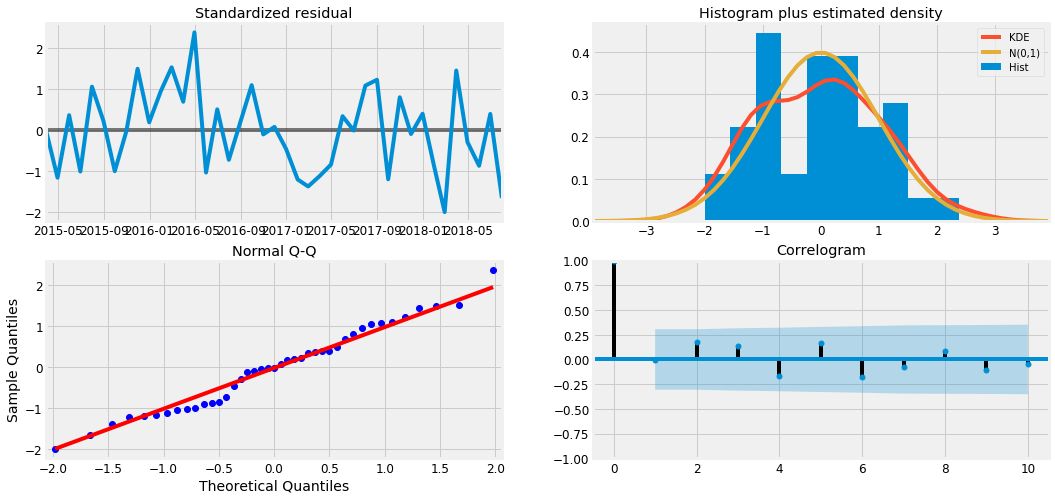

In [57]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

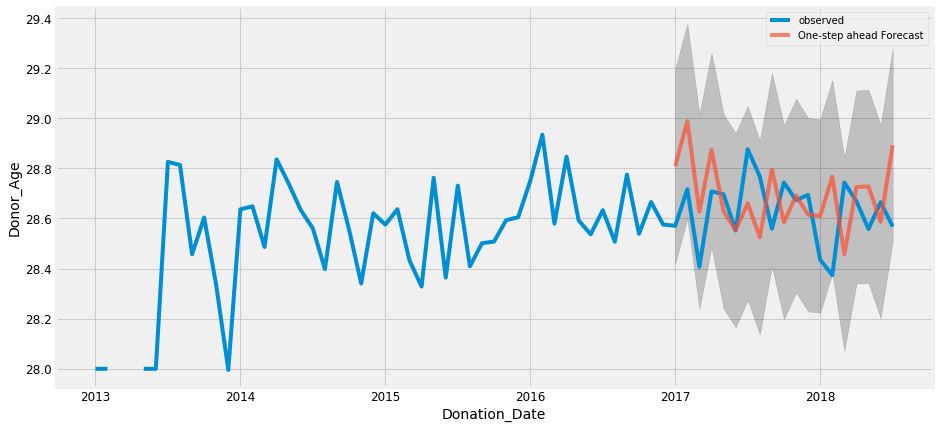

In [59]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Donation_Date')
ax.set_ylabel('Donor_Age')
plt.legend()
plt.show()

In [61]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.04


In [62]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.21


In [85]:
for i, row in df.iterrows():
     if (row['C1'] == 'N' and row['C2'] == 'N' and row['Test_3'] == 'N' and row['Test_4'] == 'N'):
         df['Result'] = 'No Disease'
     else:
         df['Result'] = 'Danger!'
df['Result']

KeyboardInterrupt: 